# 作業

思考一下我們前面有提到圖片是矩陣，但維度可能會不一樣
例如灰階圖只有兩個維度，RGB 彩圖則有 3 個維度

假如今天我們把 RGB 3 個維度拆開來看會有甚麼不同的效果呢？

In [3]:
# 下載檔案
import urllib.request
import zipfile

res = "https://cvdl.cupoy.com/file-download/part01/Part01.zip"
urllib.request.urlretrieve(res, "../../data/Part01.zip")
f = zipfile.ZipFile('../../data/Part01.zip')
f.extractall('../../data')

In [ ]:
!pip install matplotlib

     |██████████████▌                 | 3.8 MB 12 kB/s eta 0:06:2052

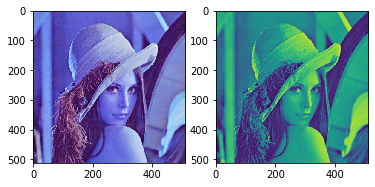

In [1]:
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

img_path = '../../data/Part01/lena.png'

img = cv2.imread(img_path, cv2.IMREAD_COLOR)

img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# while True:
    
#     cv2.imshow('RGB image', img)
    
#     cv2.imshow('GRAY image', img_gray)
    
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_gray)
plt.show()

# 如果直接把 OpenCV 讀入的圖片放進 Matplotlib 來顯示，就會出現類似這樣的顏色錯誤問題

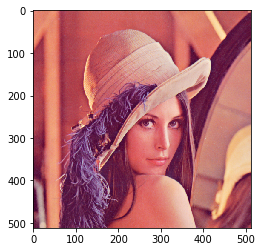

In [3]:
# 只要將 OpenCV 讀入的 BGR 格式轉為 Matplotlib 用的 RGB 格式，再交給 Matplotlib 顯示就會得到正確的結果了
# 使用 OpenCV 讀取圖檔
img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)

# 將 BGR 圖片轉為 RGB 圖片
img_rgb = img_bgr[:,:,::-1]

# 或是這樣亦可
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 使用 Matplotlib 顯示圖片
plt.imshow(img_rgb)
plt.show()


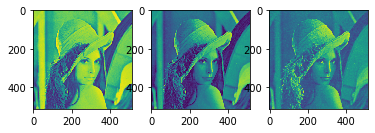

In [4]:
def get_red(img):
    redImg = img[:,:,0]
    return redImg

def get_green(img):
    greenImg = img[:,:,1]
    return greenImg

def get_blue(img):
    blueImg = img[:,:,2]
    return blueImg

img_r = get_red(img_rgb)
img_g = get_green(img_rgb)
img_b = get_blue(img_rgb)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img_r)
plt.subplot(1,3,2)
plt.imshow(img_g)
plt.subplot(1,3,3)
plt.imshow(img_b)
plt.show()

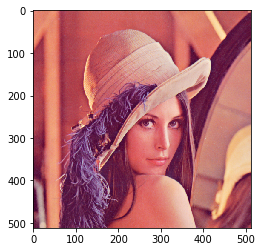

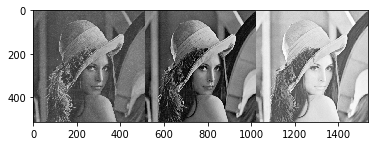

In [3]:
import numpy as np

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# 以灰階圖片的方式載入
img_concat = np.hstack((img[:, :, 0], img[:, :, 1], img[:, :, 2]))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(img_concat, cmap = 'gray')
plt.show()